### Most efficient way to map function over numpy array
https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array/46470401#46470401

100%|██████████| 20/20 [01:25<00:00,  6.46s/it]


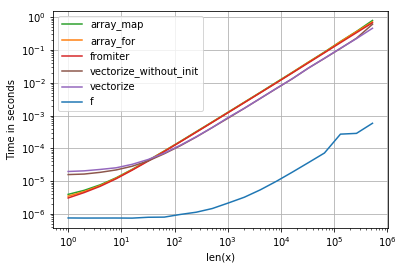

In [1]:
import numpy as np
import perfplot
import math


def f(x):
    # return math.sqrt(x)
    return np.sqrt(x)


vf = np.vectorize(f)


def array_for(x):
    return np.array([f(xi) for xi in x])


def array_map(x):
    return np.array(list(map(f, x)))


def fromiter(x):
    return np.fromiter((f(xi) for xi in x), x.dtype)


def vectorize(x):
    return np.vectorize(f)(x)


def vectorize_without_init(x):
    return vf(x)


perfplot.show(
    setup=lambda n: np.random.rand(n),
    n_range=[2**k for k in range(20)],
    kernels=[
        f,
        array_for, array_map, fromiter, vectorize, vectorize_without_init
        ],
    logx=True,
    logy=True,
    xlabel='len(x)',
    )